In [52]:
import pandas as pd            
import matplotlib.pyplot as plt 
import numpy as np              
import seaborn as sns
import sklearn
import statsmodels
import random                   
import copy       

In [5]:
# Get test sets
!wget https://physionet.org/challenge/2012/set-a.zip
!wget https://physionet.org/challenge/2012/set-b.zip

# Get outcome data for test sets    
!wget https://physionet.org/challenge/2012/Outcomes-a.txt
!wget https://physionet.org/challenge/2012/Outcomes-b.txt    

--2019-05-08 15:31:40--  https://physionet.org/challenge/2012/set-a.zip
Resolving physionet.org (physionet.org)... 128.30.30.88
Connecting to physionet.org (physionet.org)|128.30.30.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7938449 (7.6M) [application/zip]
Saving to: ‘set-a.zip’

set-a.zip           100%[===================>]   7.57M  2.55MB/s    in 3.0s    

2019-05-08 15:31:43 (2.55 MB/s) - ‘set-a.zip’ saved [7938449/7938449]

--2019-05-08 15:31:43--  https://physionet.org/challenge/2012/set-b.zip
Resolving physionet.org (physionet.org)... 128.30.30.88
Connecting to physionet.org (physionet.org)|128.30.30.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7958979 (7.6M) [application/zip]
Saving to: ‘set-b.zip’

set-b.zip           100%[===================>]   7.59M  2.57MB/s    in 3.0s    

2019-05-08 15:31:46 (2.57 MB/s) - ‘set-b.zip’ saved [7958979/7958979]

--2019-05-08 15:31:46--  https://physionet.org/challenge/2012/Ou

In [1]:
# Unzip datasets a and b
!unzip -u set-a.zip
!unzip -u set-b.zip

Archive:  set-a.zip
   creating: set-a/
  inflating: set-a/141834.txt        
  inflating: set-a/133786.txt        
  inflating: set-a/141492.txt        
  inflating: set-a/142386.txt        
  inflating: set-a/142258.txt        
  inflating: set-a/137799.txt        
  inflating: set-a/133131.txt        
  inflating: set-a/134476.txt        
  inflating: set-a/134262.txt        
  inflating: set-a/136897.txt        
  inflating: set-a/133152.txt        
  inflating: set-a/142591.txt        
  inflating: set-a/141346.txt        
  inflating: set-a/135841.txt        
  inflating: set-a/134487.txt        
  inflating: set-a/140762.txt        
  inflating: set-a/135556.txt        
  inflating: set-a/136006.txt        
  inflating: set-a/142621.txt        
  inflating: set-a/134067.txt        
  inflating: set-a/142213.txt        
  inflating: set-a/138496.txt        
  inflating: set-a/136812.txt        
  inflating: set-a/134193.txt        
  inflating: set-a/139104.txt        
  inflatin

  inflating: set-a/138319.txt        
  inflating: set-a/135404.txt        
  inflating: set-a/141544.txt        
  inflating: set-a/138766.txt        
  inflating: set-a/139583.txt        
  inflating: set-a/135273.txt        
  inflating: set-a/132872.txt        
  inflating: set-a/132786.txt        
  inflating: set-a/139891.txt        
  inflating: set-a/132726.txt        
  inflating: set-a/137321.txt        
  inflating: set-a/134150.txt        
  inflating: set-a/138248.txt        
  inflating: set-a/137723.txt        
  inflating: set-a/134223.txt        
  inflating: set-a/134448.txt        
  inflating: set-a/142082.txt        
  inflating: set-a/133418.txt        
  inflating: set-a/133164.txt        
  inflating: set-a/134861.txt        
  inflating: set-a/136229.txt        
  inflating: set-a/133771.txt        
  inflating: set-a/138625.txt        
  inflating: set-a/140095.txt        
  inflating: set-a/141574.txt        
  inflating: set-a/135199.txt        
  inflating:

  inflating: set-a/137146.txt        
  inflating: set-a/135386.txt        
  inflating: set-a/138522.txt        
  inflating: set-a/136288.txt        
  inflating: set-a/132995.txt        
  inflating: set-a/137482.txt        
  inflating: set-a/136915.txt        
  inflating: set-a/140071.txt        
  inflating: set-a/134543.txt        
  inflating: set-a/141960.txt        
  inflating: set-a/137305.txt        
  inflating: set-a/133259.txt        
  inflating: set-a/139241.txt        
  inflating: set-a/137824.txt        
  inflating: set-a/132721.txt        
  inflating: set-a/139889.txt        
  inflating: set-a/137888.txt        
  inflating: set-a/138722.txt        
  inflating: set-a/142485.txt        
  inflating: set-a/133874.txt        
  inflating: set-a/139867.txt        
  inflating: set-a/139125.txt        
  inflating: set-a/132996.txt        
  inflating: set-a/139110.txt        
  inflating: set-a/140340.txt        
  inflating: set-a/135918.txt        
  inflating:

  inflating: set-a/138779.txt        
  inflating: set-a/137054.txt        
  inflating: set-a/138643.txt        
  inflating: set-a/138607.txt        
  inflating: set-a/142400.txt        
  inflating: set-a/133185.txt        
  inflating: set-a/134934.txt        
  inflating: set-a/142428.txt        
  inflating: set-a/133248.txt        
  inflating: set-a/134104.txt        
  inflating: set-a/136389.txt        
  inflating: set-a/135197.txt        
  inflating: set-a/133427.txt        
  inflating: set-a/135247.txt        
  inflating: set-a/134314.txt        
  inflating: set-a/142319.txt        
  inflating: set-a/134794.txt        
  inflating: set-a/134805.txt        
  inflating: set-a/137855.txt        
  inflating: set-a/136418.txt        
  inflating: set-a/142380.txt        
  inflating: set-a/132622.txt        
  inflating: set-a/137208.txt        
  inflating: set-a/135805.txt        
  inflating: set-a/132598.txt        
  inflating: set-a/133444.txt        
  inflating:

  inflating: set-a/133671.txt        
  inflating: set-a/137635.txt        
  inflating: set-a/134817.txt        
  inflating: set-a/136133.txt        
  inflating: set-a/135142.txt        
  inflating: set-a/138989.txt        
  inflating: set-a/140873.txt        
  inflating: set-a/141486.txt        
  inflating: set-a/135237.txt        
  inflating: set-a/135276.txt        
  inflating: set-a/142603.txt        
  inflating: set-a/142324.txt        
  inflating: set-a/133091.txt        
  inflating: set-a/135660.txt        
  inflating: set-a/133273.txt        
  inflating: set-a/137795.txt        
  inflating: set-a/136848.txt        
  inflating: set-a/133643.txt        
  inflating: set-a/135254.txt        
  inflating: set-a/138918.txt        
  inflating: set-a/133375.txt        
  inflating: set-a/135542.txt        
  inflating: set-a/135246.txt        
  inflating: set-a/138004.txt        
  inflating: set-a/141566.txt        
  inflating: set-a/134942.txt        
  inflating:

  inflating: set-a/138972.txt        
  inflating: set-a/133031.txt        
  inflating: set-a/136577.txt        
  inflating: set-a/135499.txt        
  inflating: set-a/132732.txt        
  inflating: set-a/141683.txt        
  inflating: set-a/139070.txt        
  inflating: set-a/135610.txt        
  inflating: set-a/140920.txt        
  inflating: set-a/132805.txt        
  inflating: set-a/134415.txt        
  inflating: set-a/132602.txt        
  inflating: set-a/133897.txt        
  inflating: set-a/140872.txt        
  inflating: set-a/133493.txt        
  inflating: set-a/135951.txt        
  inflating: set-a/137443.txt        
  inflating: set-a/133284.txt        
  inflating: set-a/137531.txt        
  inflating: set-a/138312.txt        
  inflating: set-a/141620.txt        
  inflating: set-a/136619.txt        
  inflating: set-a/139915.txt        
  inflating: set-a/133891.txt        
  inflating: set-a/140402.txt        
  inflating: set-a/134376.txt        
  inflating:

  inflating: set-a/140560.txt        
  inflating: set-a/133492.txt        
  inflating: set-a/136104.txt        
  inflating: set-a/135266.txt        
  inflating: set-a/141297.txt        
  inflating: set-a/141642.txt        
  inflating: set-a/142527.txt        
  inflating: set-a/139516.txt        
  inflating: set-a/139433.txt        
  inflating: set-a/142654.txt        
  inflating: set-a/139880.txt        
  inflating: set-a/136920.txt        
  inflating: set-a/135355.txt        
  inflating: set-a/133875.txt        
  inflating: set-a/140005.txt        
  inflating: set-a/136365.txt        
  inflating: set-a/132745.txt        
  inflating: set-a/139121.txt        
  inflating: set-a/133514.txt        
  inflating: set-a/132781.txt        
  inflating: set-a/140639.txt        
  inflating: set-a/135081.txt        
  inflating: set-a/142188.txt        
  inflating: set-a/136795.txt        
  inflating: set-a/136477.txt        
  inflating: set-a/140863.txt        
  inflating:

  inflating: set-a/140358.txt        
  inflating: set-a/132758.txt        
  inflating: set-a/134949.txt        
  inflating: set-a/142304.txt        
  inflating: set-a/142020.txt        
  inflating: set-a/132891.txt        
  inflating: set-a/138117.txt        
  inflating: set-a/139674.txt        
  inflating: set-a/139641.txt        
  inflating: set-a/137626.txt        
  inflating: set-a/132543.txt        
  inflating: set-a/136781.txt        
  inflating: set-a/141752.txt        
  inflating: set-a/135794.txt        
  inflating: set-a/141461.txt        
  inflating: set-a/142033.txt        
  inflating: set-a/142634.txt        
  inflating: set-a/140807.txt        
  inflating: set-a/138923.txt        
  inflating: set-a/140763.txt        
  inflating: set-a/137911.txt        
  inflating: set-a/140343.txt        
  inflating: set-a/137351.txt        
  inflating: set-a/139514.txt        
  inflating: set-a/132801.txt        
  inflating: set-a/141446.txt        
  inflating:

  inflating: set-a/133866.txt        
  inflating: set-a/135901.txt        
  inflating: set-a/134340.txt        
  inflating: set-a/133941.txt        
  inflating: set-a/136813.txt        
  inflating: set-a/141512.txt        
  inflating: set-a/133394.txt        
  inflating: set-a/137454.txt        
  inflating: set-a/142104.txt        
  inflating: set-a/140980.txt        
  inflating: set-a/138759.txt        
  inflating: set-a/137139.txt        
  inflating: set-a/133038.txt        
  inflating: set-a/141277.txt        
  inflating: set-a/137275.txt        
  inflating: set-a/142589.txt        
  inflating: set-a/141156.txt        
  inflating: set-a/140034.txt        
  inflating: set-a/137022.txt        
  inflating: set-a/133247.txt        
  inflating: set-a/140229.txt        
  inflating: set-a/134499.txt        
  inflating: set-a/141051.txt        
  inflating: set-a/132744.txt        
  inflating: set-a/138183.txt        
  inflating: set-a/140425.txt        
  inflating:

  inflating: set-a/137537.txt        
  inflating: set-a/134948.txt        
  inflating: set-a/138193.txt        
  inflating: set-a/134161.txt        
  inflating: set-a/139767.txt        
  inflating: set-a/135044.txt        
  inflating: set-a/140841.txt        
  inflating: set-a/141116.txt        
  inflating: set-a/137764.txt        
  inflating: set-a/137133.txt        
  inflating: set-a/138651.txt        
  inflating: set-a/137570.txt        
  inflating: set-a/138255.txt        
  inflating: set-a/141965.txt        
  inflating: set-a/132777.txt        
  inflating: set-a/135894.txt        
  inflating: set-a/135793.txt        
  inflating: set-a/136550.txt        
  inflating: set-a/136358.txt        
  inflating: set-a/139715.txt        
  inflating: set-a/132992.txt        
  inflating: set-a/133858.txt        
  inflating: set-a/141113.txt        
  inflating: set-a/142212.txt        
  inflating: set-a/136643.txt        
  inflating: set-a/141554.txt        
  inflating:

  inflating: set-a/141355.txt        
  inflating: set-a/136392.txt        
  inflating: set-a/135858.txt        
  inflating: set-a/139948.txt        
  inflating: set-a/140254.txt        
  inflating: set-a/134091.txt        
  inflating: set-a/137411.txt        
  inflating: set-a/132962.txt        
  inflating: set-a/134032.txt        
  inflating: set-a/139556.txt        
  inflating: set-a/136579.txt        
  inflating: set-a/141543.txt        
  inflating: set-a/138755.txt        
  inflating: set-a/139388.txt        
  inflating: set-a/133728.txt        
  inflating: set-a/133280.txt        
  inflating: set-a/134758.txt        
  inflating: set-a/140124.txt        
  inflating: set-a/135530.txt        
  inflating: set-a/133032.txt        
  inflating: set-a/134578.txt        
  inflating: set-a/142496.txt        
  inflating: set-a/132783.txt        
  inflating: set-a/136611.txt        
  inflating: set-a/138653.txt        
  inflating: set-a/134698.txt        
  inflating:

  inflating: set-a/132666.txt        
  inflating: set-a/135454.txt        
  inflating: set-a/140880.txt        
  inflating: set-a/140770.txt        
  inflating: set-a/139067.txt        
  inflating: set-a/141693.txt        
  inflating: set-a/141147.txt        
  inflating: set-a/135406.txt        
  inflating: set-a/140428.txt        
  inflating: set-a/138426.txt        
  inflating: set-a/133960.txt        
  inflating: set-a/136441.txt        
  inflating: set-a/133040.txt        
  inflating: set-a/142160.txt        
  inflating: set-a/133811.txt        
  inflating: set-a/138348.txt        
  inflating: set-a/132963.txt        
  inflating: set-a/137304.txt        
  inflating: set-a/137802.txt        
  inflating: set-a/139831.txt        
  inflating: set-a/138366.txt        
  inflating: set-a/133380.txt        
  inflating: set-a/136585.txt        
  inflating: set-a/133183.txt        
  inflating: set-a/141786.txt        
  inflating: set-a/139726.txt        
  inflating:

  inflating: set-a/137928.txt        
  inflating: set-a/142083.txt        
  inflating: set-a/139666.txt        
  inflating: set-a/142434.txt        
  inflating: set-a/133086.txt        
  inflating: set-a/140028.txt        
  inflating: set-a/140963.txt        
  inflating: set-a/134068.txt        
  inflating: set-a/133841.txt        
  inflating: set-a/140730.txt        
  inflating: set-a/140183.txt        
  inflating: set-a/134605.txt        
  inflating: set-a/135015.txt        
  inflating: set-a/136753.txt        
  inflating: set-a/133947.txt        
  inflating: set-a/140804.txt        
  inflating: set-a/139133.txt        
  inflating: set-a/133814.txt        
  inflating: set-a/134212.txt        
  inflating: set-a/135387.txt        
  inflating: set-a/134811.txt        
  inflating: set-a/139211.txt        
  inflating: set-a/136840.txt        
  inflating: set-a/141763.txt        
  inflating: set-a/140665.txt        
  inflating: set-a/137584.txt        
  inflating:

  inflating: set-a/139310.txt        
  inflating: set-a/134342.txt        
  inflating: set-a/141776.txt        
  inflating: set-a/142665.txt        
  inflating: set-a/134762.txt        
  inflating: set-a/137800.txt        
  inflating: set-a/140817.txt        
  inflating: set-a/137196.txt        
  inflating: set-a/132929.txt        
  inflating: set-a/142281.txt        
  inflating: set-a/141665.txt        
  inflating: set-a/132685.txt        
  inflating: set-a/137119.txt        
  inflating: set-a/140196.txt        
  inflating: set-a/132810.txt        
  inflating: set-a/136810.txt        
  inflating: set-a/138495.txt        
  inflating: set-a/137960.txt        
  inflating: set-a/138486.txt        
  inflating: set-a/140660.txt        
  inflating: set-a/142262.txt        
  inflating: set-a/133270.txt        
  inflating: set-a/136338.txt        
  inflating: set-a/139337.txt        
  inflating: set-a/142649.txt        
  inflating: set-a/134429.txt        
  inflating:

  inflating: set-a/136373.txt        
  inflating: set-a/136289.txt        
  inflating: set-a/137745.txt        
  inflating: set-a/140414.txt        
  inflating: set-a/135083.txt        
  inflating: set-a/137548.txt        
  inflating: set-a/141978.txt        
  inflating: set-a/136764.txt        
  inflating: set-a/134724.txt        
  inflating: set-a/136485.txt        
  inflating: set-a/137678.txt        
  inflating: set-a/141732.txt        
  inflating: set-a/138829.txt        
  inflating: set-a/141099.txt        
  inflating: set-a/132648.txt        
  inflating: set-a/142506.txt        
  inflating: set-a/135417.txt        
  inflating: set-a/138617.txt        
  inflating: set-a/135261.txt        
  inflating: set-a/132698.txt        
  inflating: set-a/136763.txt        
  inflating: set-a/133405.txt        
  inflating: set-a/135685.txt        
  inflating: set-a/138467.txt        
  inflating: set-a/137638.txt        
  inflating: set-a/137118.txt        
  inflating:

  inflating: set-a/134999.txt        
  inflating: set-a/136949.txt        
  inflating: set-a/133269.txt        
  inflating: set-a/136183.txt        
  inflating: set-a/136538.txt        
  inflating: set-a/132556.txt        
  inflating: set-a/134515.txt        
  inflating: set-a/136714.txt        
  inflating: set-a/141406.txt        
  inflating: set-a/135527.txt        
  inflating: set-a/139402.txt        
  inflating: set-a/140759.txt        
  inflating: set-a/138017.txt        
  inflating: set-a/140366.txt        
  inflating: set-a/137059.txt        
  inflating: set-a/139848.txt        
  inflating: set-a/140035.txt        
  inflating: set-a/141611.txt        
  inflating: set-a/136899.txt        
  inflating: set-a/135459.txt        
  inflating: set-a/135997.txt        
  inflating: set-a/141106.txt        
  inflating: set-a/140969.txt        
  inflating: set-a/138350.txt        
  inflating: set-a/139144.txt        
  inflating: set-a/142000.txt        
  inflating:

  inflating: set-b/142769.txt        
  inflating: set-b/150361.txt        
  inflating: set-b/147893.txt        
  inflating: set-b/151056.txt        
  inflating: set-b/149078.txt        
  inflating: set-b/150149.txt        
  inflating: set-b/143588.txt        
  inflating: set-b/144843.txt        
  inflating: set-b/144536.txt        
  inflating: set-b/148712.txt        
  inflating: set-b/152062.txt        
  inflating: set-b/151345.txt        
  inflating: set-b/145549.txt        
  inflating: set-b/151360.txt        
  inflating: set-b/144539.txt        
  inflating: set-b/143476.txt        
  inflating: set-b/150125.txt        
  inflating: set-b/147394.txt        
  inflating: set-b/148391.txt        
  inflating: set-b/150727.txt        
  inflating: set-b/150923.txt        
  inflating: set-b/152101.txt        
  inflating: set-b/151759.txt        
  inflating: set-b/146625.txt        
  inflating: set-b/144636.txt        
  inflating: set-b/149672.txt        
  inflating:

  inflating: set-b/142688.txt        
  inflating: set-b/152583.txt        
  inflating: set-b/144664.txt        
  inflating: set-b/144397.txt        
  inflating: set-b/148631.txt        
  inflating: set-b/151788.txt        
  inflating: set-b/143541.txt        
  inflating: set-b/145380.txt        
  inflating: set-b/145202.txt        
  inflating: set-b/145660.txt        
  inflating: set-b/145892.txt        
  inflating: set-b/144014.txt        
  inflating: set-b/151388.txt        
  inflating: set-b/150744.txt        
  inflating: set-b/145598.txt        
  inflating: set-b/148102.txt        
  inflating: set-b/149114.txt        
  inflating: set-b/146016.txt        
  inflating: set-b/150697.txt        
  inflating: set-b/145216.txt        
  inflating: set-b/144102.txt        
  inflating: set-b/152649.txt        
  inflating: set-b/148918.txt        
  inflating: set-b/147386.txt        
  inflating: set-b/150602.txt        
  inflating: set-b/151334.txt        
  inflating:

  inflating: set-b/146993.txt        
  inflating: set-b/145098.txt        
  inflating: set-b/145498.txt        
  inflating: set-b/150848.txt        
  inflating: set-b/146119.txt        
  inflating: set-b/144031.txt        
  inflating: set-b/145269.txt        
  inflating: set-b/146236.txt        
  inflating: set-b/148861.txt        
  inflating: set-b/145220.txt        
  inflating: set-b/143227.txt        
  inflating: set-b/142795.txt        
  inflating: set-b/146454.txt        
  inflating: set-b/143357.txt        
  inflating: set-b/143543.txt        
  inflating: set-b/150803.txt        
  inflating: set-b/147209.txt        
  inflating: set-b/151445.txt        
  inflating: set-b/148108.txt        
  inflating: set-b/150241.txt        
  inflating: set-b/150159.txt        
  inflating: set-b/143293.txt        
  inflating: set-b/152688.txt        
  inflating: set-b/146585.txt        
  inflating: set-b/142705.txt        
  inflating: set-b/145003.txt        
  inflating:

  inflating: set-b/148315.txt        
  inflating: set-b/146143.txt        
  inflating: set-b/150841.txt        
  inflating: set-b/146890.txt        
  inflating: set-b/145364.txt        
  inflating: set-b/151037.txt        
  inflating: set-b/148130.txt        
  inflating: set-b/144190.txt        
  inflating: set-b/147630.txt        
  inflating: set-b/145287.txt        
  inflating: set-b/148491.txt        
  inflating: set-b/148362.txt        
  inflating: set-b/149900.txt        
  inflating: set-b/152554.txt        
  inflating: set-b/143581.txt        
  inflating: set-b/143132.txt        
  inflating: set-b/152179.txt        
  inflating: set-b/151339.txt        
  inflating: set-b/146511.txt        
  inflating: set-b/143307.txt        
  inflating: set-b/152111.txt        
  inflating: set-b/142772.txt        
  inflating: set-b/144434.txt        
  inflating: set-b/149979.txt        
  inflating: set-b/148596.txt        
  inflating: set-b/152720.txt        
  inflating:

  inflating: set-b/149608.txt        
  inflating: set-b/146595.txt        
  inflating: set-b/144626.txt        
  inflating: set-b/144639.txt        
  inflating: set-b/147206.txt        
  inflating: set-b/143794.txt        
  inflating: set-b/146308.txt        
  inflating: set-b/146953.txt        
  inflating: set-b/146833.txt        
  inflating: set-b/143239.txt        
  inflating: set-b/151712.txt        
  inflating: set-b/147317.txt        
  inflating: set-b/150332.txt        
  inflating: set-b/147589.txt        
  inflating: set-b/143101.txt        
  inflating: set-b/142764.txt        
  inflating: set-b/151093.txt        
  inflating: set-b/148523.txt        
  inflating: set-b/143767.txt        
  inflating: set-b/152016.txt        
  inflating: set-b/147603.txt        
  inflating: set-b/142862.txt        
  inflating: set-b/144091.txt        
  inflating: set-b/149393.txt        
  inflating: set-b/149775.txt        
  inflating: set-b/152150.txt        
  inflating:

  inflating: set-b/146497.txt        
  inflating: set-b/151113.txt        
  inflating: set-b/149922.txt        
  inflating: set-b/143336.txt        
  inflating: set-b/146873.txt        
  inflating: set-b/152573.txt        
  inflating: set-b/149810.txt        
  inflating: set-b/146048.txt        
  inflating: set-b/146967.txt        
  inflating: set-b/150899.txt        
  inflating: set-b/151243.txt        
  inflating: set-b/142700.txt        
  inflating: set-b/148540.txt        
  inflating: set-b/145926.txt        
  inflating: set-b/142997.txt        
  inflating: set-b/149165.txt        
  inflating: set-b/148220.txt        
  inflating: set-b/147694.txt        
  inflating: set-b/144768.txt        
  inflating: set-b/149491.txt        
  inflating: set-b/144956.txt        
  inflating: set-b/144379.txt        
  inflating: set-b/148959.txt        
  inflating: set-b/146421.txt        
  inflating: set-b/148684.txt        
  inflating: set-b/143632.txt        
  inflating:

  inflating: set-b/145595.txt        
  inflating: set-b/144157.txt        
  inflating: set-b/144757.txt        
  inflating: set-b/146777.txt        
  inflating: set-b/148640.txt        
  inflating: set-b/148921.txt        
  inflating: set-b/146717.txt        
  inflating: set-b/152005.txt        
  inflating: set-b/143752.txt        
  inflating: set-b/151190.txt        
  inflating: set-b/152344.txt        
  inflating: set-b/151454.txt        
  inflating: set-b/143708.txt        
  inflating: set-b/146135.txt        
  inflating: set-b/147173.txt        
  inflating: set-b/143575.txt        
  inflating: set-b/146954.txt        
  inflating: set-b/144423.txt        
  inflating: set-b/151767.txt        
  inflating: set-b/144286.txt        
  inflating: set-b/144334.txt        
  inflating: set-b/150491.txt        
  inflating: set-b/145799.txt        
  inflating: set-b/148203.txt        
  inflating: set-b/146374.txt        
  inflating: set-b/149409.txt        
  inflating:

  inflating: set-b/143485.txt        
  inflating: set-b/148304.txt        
  inflating: set-b/146494.txt        
  inflating: set-b/151763.txt        
  inflating: set-b/146211.txt        
  inflating: set-b/150468.txt        
  inflating: set-b/144227.txt        
  inflating: set-b/148675.txt        
  inflating: set-b/151541.txt        
  inflating: set-b/143216.txt        
  inflating: set-b/149667.txt        
  inflating: set-b/143180.txt        
  inflating: set-b/149400.txt        
  inflating: set-b/147670.txt        
  inflating: set-b/147887.txt        
  inflating: set-b/149368.txt        
  inflating: set-b/144077.txt        
  inflating: set-b/146448.txt        
  inflating: set-b/149376.txt        
  inflating: set-b/143554.txt        
  inflating: set-b/150416.txt        
  inflating: set-b/143313.txt        
  inflating: set-b/151394.txt        
  inflating: set-b/151043.txt        
  inflating: set-b/145466.txt        
  inflating: set-b/152653.txt        
  inflating:

  inflating: set-b/151198.txt        
  inflating: set-b/145384.txt        
  inflating: set-b/152682.txt        
  inflating: set-b/145802.txt        
  inflating: set-b/145723.txt        
  inflating: set-b/152650.txt        
  inflating: set-b/143464.txt        
  inflating: set-b/144595.txt        
  inflating: set-b/144630.txt        
  inflating: set-b/150941.txt        
  inflating: set-b/148222.txt        
  inflating: set-b/145050.txt        
  inflating: set-b/148943.txt        
  inflating: set-b/148290.txt        
  inflating: set-b/150441.txt        
  inflating: set-b/151385.txt        
  inflating: set-b/143467.txt        
  inflating: set-b/148058.txt        
  inflating: set-b/144792.txt        
  inflating: set-b/149430.txt        
  inflating: set-b/149883.txt        
  inflating: set-b/145770.txt        
  inflating: set-b/148762.txt        
  inflating: set-b/146757.txt        
  inflating: set-b/150728.txt        
  inflating: set-b/149901.txt        
  inflating:

  inflating: set-b/146683.txt        
  inflating: set-b/147777.txt        
  inflating: set-b/146362.txt        
  inflating: set-b/145286.txt        
  inflating: set-b/147678.txt        
  inflating: set-b/148424.txt        
  inflating: set-b/142875.txt        
  inflating: set-b/152547.txt        
  inflating: set-b/147623.txt        
  inflating: set-b/147602.txt        
  inflating: set-b/149980.txt        
  inflating: set-b/151994.txt        
  inflating: set-b/147904.txt        
  inflating: set-b/146108.txt        
  inflating: set-b/147023.txt        
  inflating: set-b/152265.txt        
  inflating: set-b/151695.txt        
  inflating: set-b/149007.txt        
  inflating: set-b/148678.txt        
  inflating: set-b/147798.txt        
  inflating: set-b/143548.txt        
  inflating: set-b/144124.txt        
  inflating: set-b/143148.txt        
  inflating: set-b/152517.txt        
  inflating: set-b/152723.txt        
  inflating: set-b/150198.txt        
  inflating:

  inflating: set-b/143964.txt        
  inflating: set-b/144326.txt        
  inflating: set-b/149621.txt        
  inflating: set-b/148017.txt        
  inflating: set-b/143276.txt        
  inflating: set-b/145543.txt        
  inflating: set-b/151672.txt        
  inflating: set-b/143432.txt        
  inflating: set-b/150145.txt        
  inflating: set-b/144115.txt        
  inflating: set-b/146509.txt        
  inflating: set-b/145326.txt        
  inflating: set-b/146238.txt        
  inflating: set-b/143937.txt        
  inflating: set-b/146165.txt        
  inflating: set-b/143567.txt        
  inflating: set-b/149858.txt        
  inflating: set-b/150942.txt        
  inflating: set-b/151567.txt        
  inflating: set-b/148931.txt        
  inflating: set-b/149522.txt        
  inflating: set-b/146762.txt        
  inflating: set-b/148701.txt        
  inflating: set-b/147952.txt        
  inflating: set-b/143922.txt        
  inflating: set-b/152643.txt        
  inflating:

  inflating: set-b/143401.txt        
  inflating: set-b/150310.txt        
  inflating: set-b/146721.txt        
  inflating: set-b/151940.txt        
  inflating: set-b/144735.txt        
  inflating: set-b/143305.txt        
  inflating: set-b/148602.txt        
  inflating: set-b/147733.txt        
  inflating: set-b/143637.txt        
  inflating: set-b/149840.txt        
  inflating: set-b/142683.txt        
  inflating: set-b/146080.txt        
  inflating: set-b/144096.txt        
  inflating: set-b/145964.txt        
  inflating: set-b/147119.txt        
  inflating: set-b/143112.txt        
  inflating: set-b/142921.txt        
  inflating: set-b/144052.txt        
  inflating: set-b/148028.txt        
  inflating: set-b/145428.txt        
  inflating: set-b/149597.txt        
  inflating: set-b/147425.txt        
  inflating: set-b/144524.txt        
  inflating: set-b/146632.txt        
  inflating: set-b/147182.txt        
  inflating: set-b/147962.txt        
  inflating:

  inflating: set-b/149060.txt        
  inflating: set-b/152211.txt        
  inflating: set-b/142879.txt        
  inflating: set-b/144561.txt        
  inflating: set-b/148905.txt        
  inflating: set-b/148723.txt        
  inflating: set-b/144266.txt        
  inflating: set-b/152353.txt        
  inflating: set-b/149401.txt        
  inflating: set-b/149095.txt        
  inflating: set-b/146881.txt        
  inflating: set-b/147994.txt        
  inflating: set-b/148815.txt        
  inflating: set-b/148845.txt        
  inflating: set-b/151150.txt        
  inflating: set-b/143134.txt        
  inflating: set-b/145458.txt        
  inflating: set-b/144284.txt        
  inflating: set-b/150543.txt        
  inflating: set-b/151109.txt        
  inflating: set-b/146869.txt        
  inflating: set-b/143667.txt        
  inflating: set-b/150289.txt        
  inflating: set-b/148526.txt        
  inflating: set-b/151197.txt        
  inflating: set-b/147333.txt        
  inflating:

  inflating: set-b/152621.txt        
  inflating: set-b/150501.txt        
  inflating: set-b/143670.txt        
  inflating: set-b/142980.txt        
  inflating: set-b/143138.txt        
  inflating: set-b/144445.txt        
  inflating: set-b/147204.txt        
  inflating: set-b/143460.txt        
  inflating: set-b/145942.txt        
  inflating: set-b/147101.txt        
  inflating: set-b/147266.txt        
  inflating: set-b/148662.txt        
  inflating: set-b/147605.txt        
  inflating: set-b/150646.txt        
  inflating: set-b/144761.txt        
  inflating: set-b/152814.txt        
  inflating: set-b/144516.txt        
  inflating: set-b/147181.txt        
  inflating: set-b/149130.txt        
  inflating: set-b/144596.txt        
  inflating: set-b/147169.txt        
  inflating: set-b/150285.txt        
  inflating: set-b/151242.txt        
  inflating: set-b/150222.txt        
  inflating: set-b/149219.txt        
  inflating: set-b/146246.txt        
  inflating:

  inflating: set-b/145280.txt        
  inflating: set-b/143957.txt        
  inflating: set-b/148564.txt        
  inflating: set-b/151313.txt        
  inflating: set-b/143931.txt        
  inflating: set-b/148970.txt        
  inflating: set-b/147033.txt        
  inflating: set-b/146342.txt        
  inflating: set-b/142708.txt        
  inflating: set-b/144046.txt        
  inflating: set-b/144222.txt        
  inflating: set-b/146318.txt        
  inflating: set-b/144689.txt        
  inflating: set-b/144667.txt        
  inflating: set-b/144260.txt        
  inflating: set-b/148584.txt        
  inflating: set-b/149549.txt        
  inflating: set-b/143295.txt        
  inflating: set-b/151039.txt        
  inflating: set-b/146065.txt        
  inflating: set-b/144174.txt        
  inflating: set-b/148708.txt        
  inflating: set-b/147056.txt        
  inflating: set-b/145917.txt        
  inflating: set-b/148731.txt        
  inflating: set-b/146059.txt        
  inflating:

In [53]:
import pandas as pd
import numpy as np
import os

dataset_a = 'set-a'
dataset_b = 'set-b'
train = [dataset_a]
test = [dataset_b]

In [54]:
txtfile_train = []
txtfile_test = []
for dataset in train:
    for f in os.listdir(dataset):
        with open(os.path.join(dataset,f), 'r') as fp: 
            txt = fp.readlines()
            
        RecordID = txt[1].rstrip('\n').split(',')[-1]
        txt = [t.rstrip('\n').split(',') + [int(RecordID)] for t in txt]
        txtfile_train.extend(txt[1:])

for dataset in test:
    for f in os.listdir(dataset):
        with open(os.path.join(dataset,f), 'r') as fp: 
            txt = fp.readlines()
            
        RecordID = txt[1].rstrip('\n').split(',')[-1]
        txt = [t.rstrip('\n').split(',') + [int(RecordID)] for t in txt]
        txtfile_test.extend(txt[1:])

In [55]:
trainPatientData = pd.DataFrame(txtfile_train, columns = ['Time', 'Parameter', 'Value', 'RecordID'])
testPatientData = pd.DataFrame(txtfile_test, columns = ['Time', 'Parameter', 'Value', 'RecordID'])

In [56]:
trainStaticData = trainPatientData.loc[trainPatientData['Time'] == '00:00', :].copy()
testStaticData = testPatientData.loc[testPatientData['Time'] == '00:00', :].copy()

In [58]:
len(trainStaticData)

24437

In [59]:
len(testStaticData)

24532

In [60]:
staticVariables = ['RecordID','Age', 'Gender', 'Height', 'ICUType', 'Weight']
trainStaticData = trainStaticData.loc[trainPatientData['Parameter'].isin(staticVariables)]
testStaticData = testStaticData.loc[testPatientData['Parameter'].isin(staticVariables)]

In [61]:
len(trainStaticData)

24000

In [65]:
len(testStaticData)

24001

In [68]:
trainDrop = trainStaticData.index
trainPatientData = trainPatientData.loc[~trainPatientData.index.isin(trainDrop),:]
trainPatientData.head()

,Time,Parameter,Value,RecordID
6,01:20,GCS,15,132592
7,01:20,HR,112,132592
8,01:20,NIDiasABP,43,132592
9,01:20,NIMAP,68.67,132592
10,01:20,NISysABP,120,132592


In [69]:
testDrop = testStaticData.index
testPatientData = testPatientData.loc[~testPatientData.index.isin(testDrop),:]
testPatientData.head()

,Time,Parameter,Value,RecordID
6,00:04,DiasABP,60,144404
7,00:04,GCS,11,144404
8,00:04,HR,85,144404
9,00:04,MAP,90,144404
10,00:04,NIDiasABP,68,144404


In [78]:
# Make sure each value is a float
testPatientData['Value'] = pd.to_numeric(testPatientData['Value'])
trainPatientData['Value'] = pd.to_numeric(trainPatientData['Value'])

In [71]:
trainStaticData = trainStaticData.groupby(['RecordID','Parameter'])[['Value']].last()
testStaticData = testStaticData.groupby(['RecordID','Parameter'])[['Value']].last()
trainStaticData.reset_index(inplace=True)
testStaticData.reset_index(inplace=True)

In [72]:
trainStaticData = trainStaticData.pivot(index='RecordID',columns='Parameter',values='Value')
testStaticData = testStaticData.pivot(index='RecordID',columns='Parameter',values='Value')

In [74]:
testStaticData.head()

Parameter,Age,Gender,Height,ICUType,RecordID,Weight
RecordID,,,,,,
142675,70,1,175.3,2,142675,85
142676,57,0,-1,3,142676,-1
142680,60,1,182.9,3,142680,78.8
142683,64,1,180.3,2,142683,145.2
142688,51,1,172.7,4,142688,90


In [75]:
trainStaticData.head()

Parameter,Age,Gender,Height,ICUType,RecordID,Weight
RecordID,,,,,,
132539,54,0,-1,4,132539,-1
132540,76,1,175.3,2,132540,76
132541,44,0,-1,3,132541,56.7
132543,68,1,180.3,3,132543,84.6
132545,88,0,-1,3,132545,-1


In [86]:
testStaticData['Age'] = pd.to_numeric(testStaticData['Age'])
trainStaticData['Age'] = pd.to_numeric(trainStaticData['Age'])

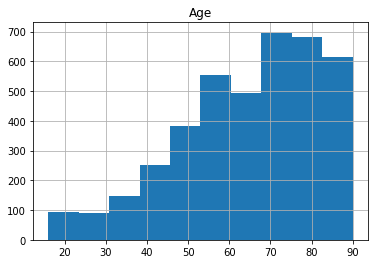

In [94]:
testStaticData.hist(['Age'])
plt.show()

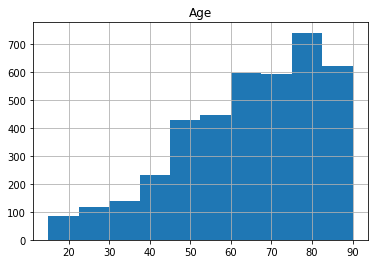

In [99]:
trainStaticData.hist(['Age'])
plt.show()